In [6]:
pip install gymnasium imageio tqdm

Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import gymnasium as gym
import random
import imageio
from tqdm.notebook import trange
from IPython.display import Image, display

In [8]:
env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=False, render_mode="rgb_array")

print("Observation Space:", env.observation_space)
print("Sample observation:", env.observation_space.sample())
print("Action Space Shape:", env.action_space.n)
print("Action Space Sample:", env.action_space.sample())

Observation Space: Discrete(16)
Sample observation: 10
Action Space Shape: 4
Action Space Sample: 3


In [9]:
state_space = env.observation_space.n
action_space = env.action_space.n
print("There are", action_space, "possible actions")

def initialize_q_table(state_space, action_space):
    return np.zeros((state_space, action_space))

Qtable_frozenlake = initialize_q_table(state_space, action_space)

def epsilon_greedy_policy(Qtable, state, epsilon):
    if random.uniform(0, 1) > epsilon:
        action = np.argmax(Qtable[state])
    else:
        action = env.action_space.sample()
    return action

def greedy_policy(Qtable, state):
    return np.argmax(Qtable[state])

There are 4 possible actions


In [14]:
n_training_episodes = 1000
learning_rate = 0.7
n_eval_episodes = 100
max_steps = 99
gamma = 0.95
max_epsilon = 1.0
min_epsilon = 0.5
decay_rate = 0.0005

In [16]:
def train(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, max_steps, Qtable):
    for episode in trange(n_training_episodes):
        state, _ = env.reset()
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)

        for step in range(max_steps):
            action = epsilon_greedy_policy(Qtable, state, epsilon)
            new_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated

            Qtable[state][action] += learning_rate * (
                reward + gamma * np.max(Qtable[new_state]) - Qtable[state][action]
            )

            if done:
                break
            state = new_state
    return Qtable

Qtable_frozenlake = train(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, max_steps, Qtable_frozenlake)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [18]:
def evaluate_agent(env, max_steps, n_eval_episodes, Qtable):
    episode_rewards = []

    for episode in range(n_eval_episodes):
        state, _ = env.reset()
        total_rewards_ep = 0

        for step in range(max_steps):
            action = np.argmax(Qtable[state])
            new_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            total_rewards_ep += reward

            if done:
                break
            state = new_state

        episode_rewards.append(total_rewards_ep)

    mean_reward = np.mean(episode_rewards)
    std_reward = np.std(episode_rewards)
    return mean_reward, std_reward

mean, std = evaluate_agent(env, max_steps, n_eval_episodes, Qtable_frozenlake)
print(f"Average reward: {mean:.2f} ± {std:.2f}")

Average reward: 1.00 ± 0.00


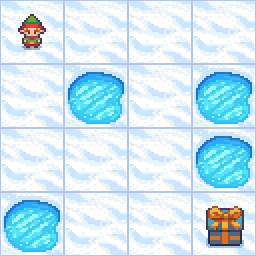

In [23]:
def record_video(env, Qtable, video_path, fps=2):
    frames = []
    state, _ = env.reset()

    for _ in range(100):
        frames.append(env.render())
        action = np.argmax(Qtable[state])
        state, _, terminated, truncated, _ = env.step(action)
        if terminated or truncated:
            frames.append(env.render())
            break

    imageio.mimsave(video_path, frames, fps=fps)

video_path = "replay.gif"
record_video(env, Qtable_frozenlake, video_path)
display(Image(filename=video_path))

In [24]:
pip install "gymnasium[toy-text]"

Note: you may need to restart the kernel to use updated packages.
